In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import log
from sklearn import linear_model

#comment below if not using ipython notebook
%matplotlib inline

In [2]:
#read csv
anscombe_i = pd.read_csv('./rate2.csv')
anscombe_i

,x,y
0,26354.907925,-160
1,26355.002523,4153
2,26355.002563,4214
3,26355.002575,4206
4,26355.002587,4213
...,...,...
226,26357.786602,137925
227,26357.786613,138030
228,26357.882525,142471
229,26357.882553,142473


Text(0.5, 0, 'X')

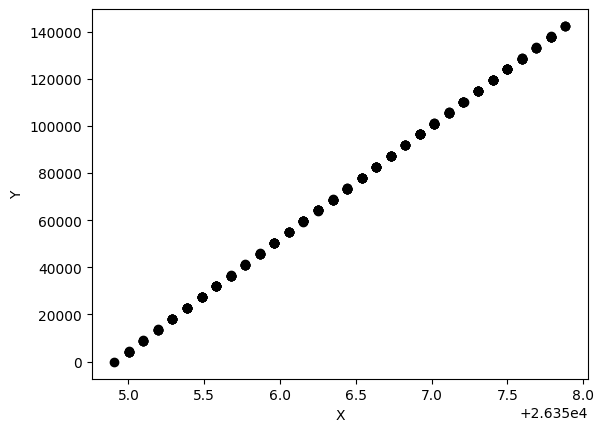

In [3]:
plt.scatter(anscombe_i.x, anscombe_i.y,  color='black')
plt.ylabel("Y")
plt.xlabel("X")

Coefficients: 
 [[48001.15530048]]
Residual sum of squares: 4785.14
Variance score: 1.00


Text(0.5, 0, 'y')

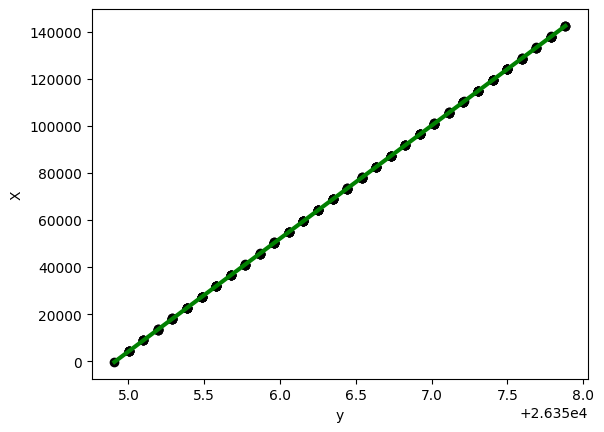

In [24]:
regr_i = linear_model.LinearRegression()

#We need to reshape the data to be a matrix
# with only one column
X = anscombe_i.x.values.reshape((len(anscombe_i.x), 1))
y = anscombe_i.y.values.reshape((len(anscombe_i.y), 1))

#Fit a line 
regr_i.fit(X,y)

# The coefficients
print('Coefficients: \n', regr_i.coef_)

# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr_i.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_i.score(X, y))

plt.plot(X,regr_i.predict(X), color='green',
         linewidth=3)

plt.scatter(anscombe_i.x, anscombe_i.y,  color='black')

plt.ylabel("X")
plt.xlabel("y")

In [11]:
from sklearn.linear_model import LinearRegression
score_df = pd.read_csv('./.csv')
score_df.head()

,x,y
0,26354.907925,-160
1,26355.002523,4153
2,26355.002563,4214
3,26355.002575,4206
4,26355.002587,4213


In [12]:
score_df.describe()

,x,y
count,231.000000,231.000000
mean,26356.457543,74096.787879
std,0.826306,39663.712206
min,26354.907925,-160.000000
25%,26355.770527,41091.500000
50%,26356.442603,73466.000000
75%,26357.210537,110215.000000
max,26357.882563,142478.000000


In [13]:
X = score_df.iloc[:, :-1].values
y = score_df.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

LinearRegression()

In [9]:
y_pred = regressor.predict(X_test)

69.1746774118454


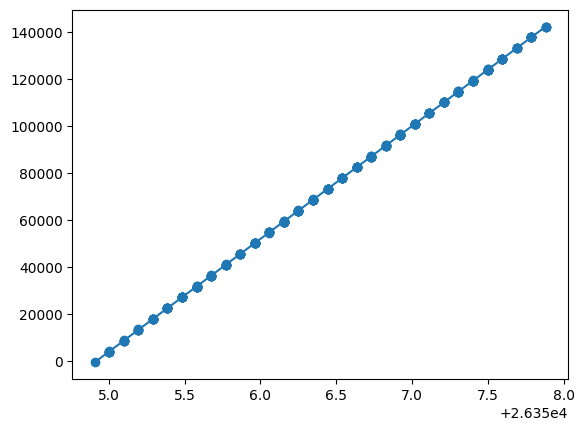

In [22]:
x = anscombe_i.x
y = anscombe_i.y

# Fit the linear regression model
model = np.polyfit(x, y, 1)
# Plot the data and the fitted line
plt.scatter(x, y)
plt.plot(x, model[0] * x + model[1])
# Calculate the standard error of the slope
se = np.sqrt(np.mean((y - (model[0] * x + model[1]))**2))
# Plot the standard error band
plt.fill_between(x, model[0] * x + model[1] + se, model[0] * x + model[1] - se, alpha=0.2)

print(se)
